In [59]:
import pickle
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

In [60]:
dat=pickle.load(open('/home/maria/Documents/HarvardData/processed_sessions_v3/Bo220226/session_responses.p','rb'))
dino=pickle.load(open('/home/maria/Documents/HarvardData/processed_sessions_v3/Bo220226/dinov2_features.p','rb'))
dino_mid=pickle.load(open('/home/maria/Documents/HarvardData/processed_sessions_v3/Bo220226_middle_layers/dinov2_features.p','rb'))

ridge=Ridge()

ridge.fit(dino,dat.T[0,:])

pred_ridge=ridge.predict(dino)



In [61]:
print(dino.shape)

(1250, 768)


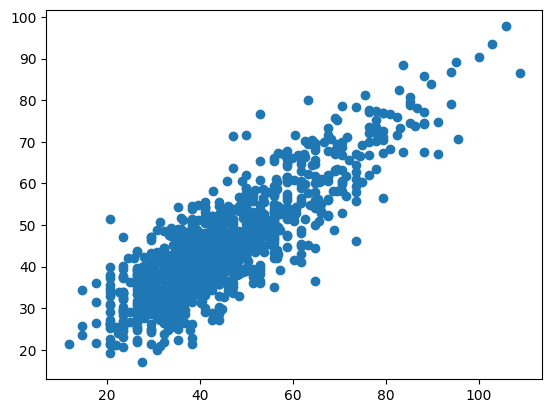

In [3]:
plt.plot(dat.T[0,:],pred_ridge,'o')

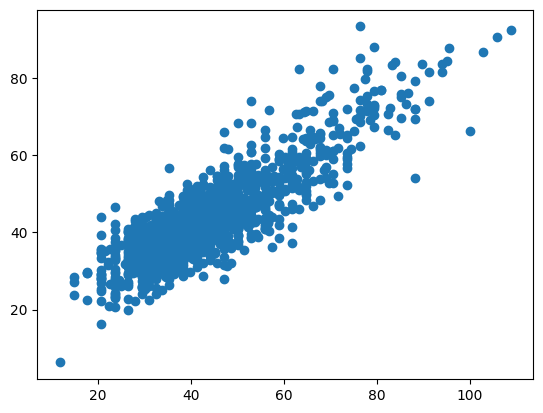

In [5]:
ridge=Ridge()

ridge.fit(dino_mid,dat.T[0,:])

pred_ridge=ridge.predict(dino_mid)

plt.plot(dat.T[0,:],pred_ridge,'o')

In [28]:
import pickle
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load data
dat = pickle.load(open('/home/maria/Documents/HarvardData/processed_sessions_v3/Bo220226/session_responses.p', 'rb'))
dino = pickle.load(open('/home/maria/Documents/HarvardData/processed_sessions_v3/Bo220226/dinov2_features.p', 'rb'))
dino_mid = pickle.load(open('/home/maria/Documents/HarvardData/processed_sessions_v3/Bo220226_middle_layers/dinov2_features.p', 'rb'))

# Train-test split (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(dino, dat.T[0, :], test_size=0.2, random_state=42)

# Initialize Ridge regression
ridge = Lasso()

# Fit the model on the training set
ridge.fit(X_train, y_train)

pred_ridge = ridge.predict(X_train)

# Predict on the test set
y_pred_test = ridge.predict(X_test)

# Calculate variance explained (R^2 score) on the test set
variance_explained = r2_score(y_test, y_pred_test)

variance_explained_train= r2_score(pred_ridge, y_train)
print(f"Variance explained (R^2) on the test set: {variance_explained:.4f}")
variance_explained_train


Variance explained (R^2) on the test set: 0.1716


-1.9222783775783858

In [45]:
import pickle
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load data
dat = pickle.load(open('/home/maria/Documents/HarvardData/processed_sessions_v3/Bo220226/session_responses.p', 'rb'))
dino = pickle.load(open('/home/maria/Documents/HarvardData/processed_sessions_v3/Bo220226/dinov2_features.p', 'rb'))
dino_mid = pickle.load(open('/home/maria/Documents/HarvardData/processed_sessions_v3/Bo220226_middle_layers/dinov2_features.p', 'rb'))

# Train-test split (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(dino, dat, test_size=0.5, random_state=42)

# Initialize Ridge regression
ridge = Lasso(alpha=0.1)

# Fit the model on the training set
ridge.fit(X_train, y_train)

pred_ridge = ridge.predict(X_train)

# Predict on the test set
y_pred_test = ridge.predict(X_test)

# Calculate variance explained (R^2 score) on the test set
variance_explained = r2_score(y_test, y_pred_test, multioutput='raw_values')

variance_explained_train= r2_score(pred_ridge, y_train, multioutput='raw_values')
print(f"Variance explained (R^2) on the test set: {variance_explained}")
variance_explained_train


/home/maria/MousePipeline/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.658e+03, tolerance: 4.282e+02
  model = cd_fast.enet_coordinate_descent(


Variance explained (R^2) on the test set: [-0.30453339 -0.50505461 -0.57886342 -0.34190728 -0.7819644  -0.41566863
 -0.33280158 -0.51735567 -0.63610611 -0.71591473 -0.54243361 -0.72365908
 -0.99316531 -0.64438977 -0.91821667 -0.52862424 -0.59998096 -1.05858593
 -0.73159362 -1.11937405 -0.8038303  -0.75412776 -0.56238466 -0.74517495
 -0.85551224 -0.64300521 -0.46690575 -1.06840092 -0.94008632 -0.96378526
 -0.88914758 -1.1039677  -0.65159035 -0.53059186 -0.61657236 -0.19037729
 -0.64015587 -0.59227159 -0.77448226 -0.38599088 -0.92251047 -0.75479659
 -0.43657311 -0.76007337 -0.69959197 -0.51747772 -0.97321019 -0.75941962
 -0.73535497 -0.56762349 -0.71778554 -0.49785614 -0.47843102 -0.74023358
 -0.96698704 -3.02317032 -0.43046331 -0.68234122 -0.99751175 -0.3666385
 -0.80826402 -0.66372942 -1.53079217 -0.82887894]


array([0.81380457, 0.8143248 , 0.36238814, 0.69651623, 0.71580624,
       0.87218148, 0.8603156 , 0.679352  , 0.69168498, 0.6501483 ,
       0.87610673, 0.68165386, 0.60876346, 0.71586744, 0.80665329,
       0.850656  , 0.76492066, 0.71584007, 0.60822928, 0.80984069,
       0.64926351, 0.71606941, 0.85903998, 0.37061317, 0.92391833,
       0.66486284, 0.74708806, 0.7746838 , 0.9113986 , 0.78769422,
       0.81208134, 0.73561211, 0.63552843, 0.6823981 , 0.79233583,
       0.67043743, 0.76721364, 0.83326376, 0.54469961, 0.81002701,
       0.74645788, 0.83631394, 0.7264977 , 0.86461425, 0.58451172,
       0.89145298, 0.64416359, 0.76191665, 0.83853439, 0.8401586 ,
       0.6704155 , 0.65723826, 0.88464956, 0.66531789, 0.94402088,
       0.98527391, 0.79628295, 0.84923226, 0.94946027, 0.43385068,
       0.78287143, 0.9242542 , 0.8074461 , 0.67244593])

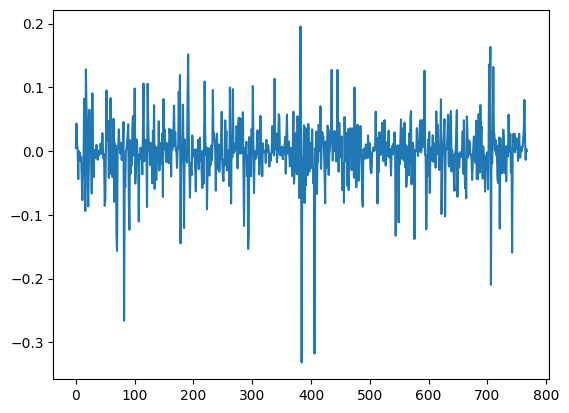

In [40]:
plt.plot(np.mean(ridge.coef_.T,axis=1))

In [16]:
import pickle
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load data
dat = pickle.load(open('/home/maria/Documents/HarvardData/processed_sessions_v3/Bo220226/session_responses.p', 'rb'))
dino = pickle.load(open('/home/maria/Documents/HarvardData/processed_sessions_v3/Bo220226/dinov2_features.p', 'rb'))
dino_mid = pickle.load(open('/home/maria/Documents/HarvardData/processed_sessions_v3/Bo220226_middle_layers/dinov2_features.p', 'rb'))

# Train-test split (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(dino_mid, dat.T[0, :], test_size=0.2, random_state=42)

# Initialize Ridge regression
ridge = Ridge(alpha=1000)

# Fit the model on the training set
ridge.fit(X_train, y_train)

pred_ridge = ridge.predict(X_train)

# Predict on the test set
y_pred_test = ridge.predict(X_test)

# Calculate variance explained (R^2 score) on the test set
variance_explained = r2_score(y_test, y_pred_test)

variance_explained_train= r2_score(pred_ridge, y_train)
print(f"Variance explained (R^2) on the test set: {variance_explained:.4f}")
variance_explained_train

print(X_train.shape)


Variance explained (R^2) on the test set: 0.2036
(1000, 2304)


In [13]:
print(dat.shape)
print(dino.shape)
print(dino_mid.shape)
print(X_train.shape)
print(y_train.shape)

(1250, 64)
(1250, 768)
(1250, 2304)
(1000, 2304)
(1000,)


In [25]:
import pickle
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA

# Load data
dat = pickle.load(open('/home/maria/Documents/HarvardData/processed_sessions_v3/Bo220226/session_responses.p', 'rb'))
dino = pickle.load(open('/home/maria/Documents/HarvardData/processed_sessions_v3/Bo220226/dinov2_features.p', 'rb'))
dino_mid = pickle.load(open('/home/maria/Documents/HarvardData/processed_sessions_v3/Bo220226_middle_layers/dinov2_features.p', 'rb'))

# Perform PCA on dino to reduce to 100 components
pca = PCA(n_components=100)
dino_pca = pca.fit_transform(dino)

# Train-test split (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(dino_pca, dat, test_size=0.2, random_state=42)

# Initialize Ridge regression
ridge = Ridge()

# Fit the model on the training set
ridge.fit(X_train, y_train)

# Predict on the test set
y_pred_test = ridge.predict(X_test)

print(y_pred_test.shape)
# Calculate variance explained (R^2 score) on the test set
variance_explained = r2_score(y_test, y_pred_test)

print(f"Variance explained (R^2) on the test set: {variance_explained:.4f}")


(250, 64)
Variance explained (R^2) on the test set: 0.0705


In [27]:
import torch
import torch.nn as nn
from sklearn.metrics import r2_score
import pickle
import numpy as np

# Load data
dat = pickle.load(open('/home/maria/Documents/HarvardData/processed_sessions_v3/Bo220226/session_responses.p', 'rb'))
dino = pickle.load(open('/home/maria/Documents/HarvardData/processed_sessions_v3/Bo220226/dinov2_features.p', 'rb'))

# Define the RNN model
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        rnn_out, _ = self.rnn(x)
        out = self.fc(rnn_out[:, -1, :])  # Use the last output
        return out

# Preprocess data
X = torch.tensor(dino, dtype=torch.float32)  # Features
y = torch.tensor(dat.T[1, :], dtype=torch.float32)  # Target

# Leave the last 20% of the data for testing
n_samples = X.shape[0]
n_train = int(0.8 * n_samples)

X_train, X_test = X[:n_train], X[n_train:]
y_train, y_test = y[:n_train], y[n_train:]

# Hyperparameters
input_size = X_train.shape[1]
hidden_size = 64  # Adjust as needed
output_size = 1
learning_rate = 0.001
num_epochs = 50
batch_size = 64

# Initialize model, loss, and optimizer
model = SimpleRNN(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train[i:i+batch_size].unsqueeze(1)
        y_batch = y_train[i:i+batch_size].unsqueeze(1)
        
        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Print loss for every epoch
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Evaluate variance explained (R²)
model.eval()
with torch.no_grad():
    y_train_pred = model(X_train.unsqueeze(1)).squeeze(1).numpy()
    y_test_pred = model(X_test.unsqueeze(1)).squeeze(1).numpy()

variance_explained_train = r2_score(y_train.numpy(), y_train_pred)
variance_explained_test = r2_score(y_test.numpy(), y_test_pred)

print(f"Variance explained (R²) on the training set: {variance_explained_train:.4f}")
print(f"Variance explained (R²) on the test set: {variance_explained_test:.4f}")


Epoch [10/50], Loss: 1031.8772
Epoch [20/50], Loss: 575.0363
Epoch [30/50], Loss: 339.4933
Epoch [40/50], Loss: 229.4755
Epoch [50/50], Loss: 185.3123
Variance explained (R²) on the training set: -0.1604
Variance explained (R²) on the test set: -0.2564


In [47]:
import pickle
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load data
dat = pickle.load(open('/home/maria/Documents/HarvardData/processed_sessions_v3/Bo220226/session_responses.p', 'rb'))
dino = pickle.load(open('/home/maria/Documents/HarvardData/processed_sessions_v3/Bo220226/dinov2_features.p', 'rb'))
dino_mid = pickle.load(open('/home/maria/Documents/HarvardData/processed_sessions_v3/Bo220226_middle_layers/dinov2_features.p', 'rb'))

# Train-test split (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(dino, dat, test_size=0.8, random_state=42)

# Initialize Ridge regression
lasso = Lasso(alpha=0.1)

# Fit the model on the training set
lasso.fit(X_train, y_train)

pred_lasso = ridge.predict(X_train)

# Predict on the test set
y_pred_test = lasso.predict(X_test)

# Calculate variance explained (R^2 score) on the test set
variance_explained = r2_score(y_test, y_pred_test, multioutput='raw_values')

variance_explained_train= r2_score(pred_lasso, y_train, multioutput='raw_values')
print(f"Variance explained (R^2) on the test set: {variance_explained}")
variance_explained_train


/home/maria/MousePipeline/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.880e+00, tolerance: 4.443e+00
  model = cd_fast.enet_coordinate_descent(
/home/maria/MousePipeline/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.179e+00, tolerance: 4.073e+00
  model = cd_fast.enet_coordinate_descent(
/home/maria/MousePipeline/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

Variance explained (R^2) on the test set: [-0.46607376 -0.47711964 -0.76622541 -0.4912959  -0.61083905 -0.29745375
 -0.23366674 -0.5783163  -0.72751913 -0.94831937 -0.40602154 -0.83893477
 -1.09160054 -0.61277022 -0.69558579 -0.62584786 -0.37913078 -0.91509804
 -0.83804454 -0.73349733 -0.82095886 -0.86711738 -0.48659497 -0.82931515
 -0.57448115 -0.66981014 -0.47905143 -0.76725236 -0.54942784 -0.93261718
 -0.82534198 -0.65012438 -0.88904597 -0.4629322  -0.5374501  -0.41404011
 -0.80487543 -0.74666683 -1.15437202 -0.55202537 -0.65505637 -0.75154405
 -0.59993452 -0.5129644  -0.65346282 -0.26280449 -0.87961347 -0.72741724
 -0.56489299 -0.44944651 -0.82228604 -1.03724072 -0.16766646 -0.68372825
 -0.49215363 -1.13785088 -0.44437047 -0.7300323  -0.51475641 -0.68038945
 -0.77980955 -0.55398924 -1.39477455 -0.78182976]


/home/maria/MousePipeline/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.389e+01, tolerance: 6.580e+00
  model = cd_fast.enet_coordinate_descent(


array([0.8158362 , 0.82895893, 0.36630367, 0.69608679, 0.73537831,
       0.88394111, 0.88327011, 0.68409996, 0.69766058, 0.63496503,
       0.88899052, 0.66523603, 0.66743132, 0.74827765, 0.79916099,
       0.8614505 , 0.74977852, 0.66405988, 0.64124467, 0.83416254,
       0.62182541, 0.72186042, 0.85620237, 0.36854657, 0.92000803,
       0.6901547 , 0.77006448, 0.79841758, 0.90088857, 0.80458722,
       0.83531325, 0.73704921, 0.61395769, 0.70427731, 0.76516037,
       0.64865777, 0.75921752, 0.82409588, 0.55869829, 0.81356637,
       0.73323683, 0.83267573, 0.73824426, 0.8633893 , 0.55552701,
       0.87329863, 0.60726234, 0.72392878, 0.78725127, 0.82611063,
       0.62834263, 0.58657107, 0.88143215, 0.70803645, 0.94311836,
       0.98661002, 0.79314166, 0.85114339, 0.95547832, 0.39229877,
       0.7702973 , 0.91645059, 0.8071594 , 0.65309771])

In [55]:
import torch
import torch.nn as nn
from sklearn.metrics import r2_score
import pickle
import numpy as np

# Load data
dat = pickle.load(open('/home/maria/Documents/HarvardData/processed_sessions_v3/Bo220226/session_responses.p', 'rb'))
dino = pickle.load(open('/home/maria/Documents/HarvardData/processed_sessions_v3/Bo220226/dinov2_features.p', 'rb'))

# Define the fully connected neural network model
class FullyConnectedNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FullyConnectedNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x=self.relu2(x)
        x = self.fc3(x)
        return x

# Preprocess data
X = torch.tensor(dino, dtype=torch.float32)  # Features
y = torch.tensor(dat, dtype=torch.float32)  # Target

# Leave the last 20% of the data for testing
n_samples = X.shape[0]
n_train = int(0.8 * n_samples)

X_train, X_test = X[:n_train], X[n_train:]
y_train, y_test = y[:n_train], y[n_train:]

# Hyperparameters
input_size = X_train.shape[1]
hidden_size = 128  # Adjust as needed
output_size = 64
learning_rate = 0.001
num_epochs = 500
batch_size = 64

# Initialize model, loss, and optimizer
model = FullyConnectedNN(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size].unsqueeze(1)
        
        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Print loss for every epoch
    #if (epoch+1) % 10 == 0:
        #print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Evaluate variance explained (R²)
model.eval()
with torch.no_grad():
    y_train_pred = model(X_train).squeeze(1).numpy()
    y_test_pred = model(X_test).squeeze(1).numpy()

variance_explained_train = r2_score(y_train.numpy(), y_train_pred, multioutput='raw_values')
variance_explained_test = r2_score(y_test.numpy(), y_test_pred, multioutput='raw_values')

print(f"Variance explained (R²) on the training set: {variance_explained_train}")
print(f"Variance explained (R²) on the test set: {variance_explained_test}")


/home/maria/MousePipeline/.venv/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([64, 1, 64])) that is different to the input size (torch.Size([64, 64])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/maria/MousePipeline/.venv/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([40, 1, 64])) that is different to the input size (torch.Size([40, 64])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Variance explained (R²) on the training set: [ 0.01387769  0.02785474 -0.0037148   0.01603138  0.01477242  0.01876426
  0.02560908  0.00863516  0.00348616  0.00932902  0.01620322  0.02144933
  0.02858901  0.02031362  0.02790415  0.01866168  0.01476878  0.00822073
  0.01093036  0.02169788  0.00369859  0.01950556  0.02170068  0.00277519
  0.01542008  0.00963104  0.0227052   0.01934332  0.02098507  0.02039516
  0.01403779  0.0141657   0.01116395  0.01227218  0.03680891  0.01856333
  0.01757765  0.01624703  0.00786144  0.02217746  0.00244296  0.01261532
  0.01711255  0.02333409  0.00876141  0.02173615  0.0117833   0.0104962
  0.02501059  0.01847905  0.0214811   0.00782514  0.02370328  0.0109188
  0.01862067  0.00562203  0.02112466  0.0179227   0.00983441 -0.00156879
  0.01196855  0.01474947  0.0151881   0.01217037]
Variance explained (R²) on the test set: [-0.21795166 -0.20044672 -0.14520729 -0.3598287  -0.3343221  -0.07471037
 -0.0479095  -0.17685914 -0.19674325 -0.11330736 -0.17955673 -0

In [58]:
import torch
import torch.nn as nn
from sklearn.metrics import r2_score
import pickle
import numpy as np

# Load data
dat = pickle.load(open('/home/maria/Documents/HarvardData/processed_sessions_v3/Bo220226/session_responses.p', 'rb'))
dino = pickle.load(open('/home/maria/Documents/HarvardData/processed_sessions_v3/Bo220226/dinov2_features.p', 'rb'))

# Define the fully connected neural network model with dropout
class FullyConnectedNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate=0.5):
        super(FullyConnectedNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)  # Apply dropout after activation
        x = self.fc2(x)
        return x

# Preprocess data
X = torch.tensor(dino, dtype=torch.float32)  # Features
y = torch.tensor(dat, dtype=torch.float32)  # Target

# Leave the last 20% of the data for testing
n_samples = X.shape[0]
n_train = int(0.8 * n_samples)

X_train, X_test = X[:n_train], X[n_train:]
y_train, y_test = y[:n_train], y[n_train:]

# Hyperparameters
input_size = X_train.shape[1]
hidden_size = 64  # Adjust as needed
output_size = 64
dropout_rate = 0.5  # Dropout rate
learning_rate = 0.001
num_epochs = 50
batch_size = 64

# Initialize model, loss, and optimizer
model = FullyConnectedNN(input_size, hidden_size, output_size, dropout_rate)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size].unsqueeze(1)
        
        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Print loss for every epoch
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Evaluate variance explained (R²)
model.eval()
with torch.no_grad():
    y_train_pred = model(X_train).squeeze(1).numpy()
    y_test_pred = model(X_test).squeeze(1).numpy()

variance_explained_train = r2_score(y_train.numpy(), y_train_pred, multioutput='raw_values')
variance_explained_test = r2_score(y_test.numpy(), y_test_pred, multioutput='raw_values')

print(f"Variance explained (R²) on the training set: {variance_explained_train}")
print(f"Variance explained (R²) on the test set: {variance_explained_test}")


/home/maria/MousePipeline/.venv/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([64, 1, 64])) that is different to the input size (torch.Size([64, 64])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/maria/MousePipeline/.venv/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([40, 1, 64])) that is different to the input size (torch.Size([40, 64])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [10/50], Loss: 410.9135
Epoch [20/50], Loss: 338.4910
Epoch [30/50], Loss: 345.0700
Epoch [40/50], Loss: 335.6331
Epoch [50/50], Loss: 337.3322
Variance explained (R²) on the training set: [-0.02305377 -0.0424881  -0.02778196 -0.05775714 -0.07086098 -0.00592721
 -0.02725995 -0.04868329 -0.03218818 -0.05056798 -0.03135931 -0.075091
 -0.03251588 -0.0542717  -0.02916098 -0.02786076 -0.03109455 -0.06915832
 -0.05949736 -0.0463587  -0.06250787 -0.06362653 -0.03358006 -0.05045068
 -0.02768171 -0.09480691 -0.03837097 -0.03894401 -0.01595783 -0.09251916
 -0.06790996 -0.04053533 -0.07977688 -0.0249958  -0.02293038 -0.00135076
 -0.06344163 -0.02654421 -0.01291335 -0.04103327 -0.0946281  -0.03016102
 -0.04136276 -0.01588726 -0.04838967 -0.00896156 -0.06720448 -0.05884743
 -0.02888322 -0.02010322 -0.05454326 -0.05981648  0.00328785 -0.06435823
 -0.01223242 -0.00212574 -0.02109289 -0.02625668  0.00364912 -0.03992701
 -0.06640315 -0.01077008 -0.03173685 -0.03470504]
Variance explained (R²) on 